Based on the examdata.csv, build a logistic regression model to predict when `Exam1=75 Exam2=60`, can him pass Exam3.
Change the edge to square(`x1^2, x2^2`) and check if the performance will be better

In [69]:
# Load data
import pandas as pd
import numpy as np

data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.62366,78.02469,0
1,30.28671,43.89500,0
2,35.84741,72.90220,0
3,60.18260,86.30855,1
4,79.03274,75.34438,1


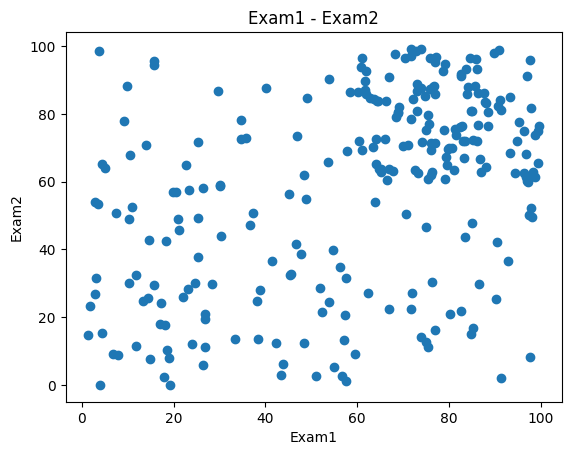

In [70]:
# Visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, "Exam1"], data.loc[:, 'Exam2'])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

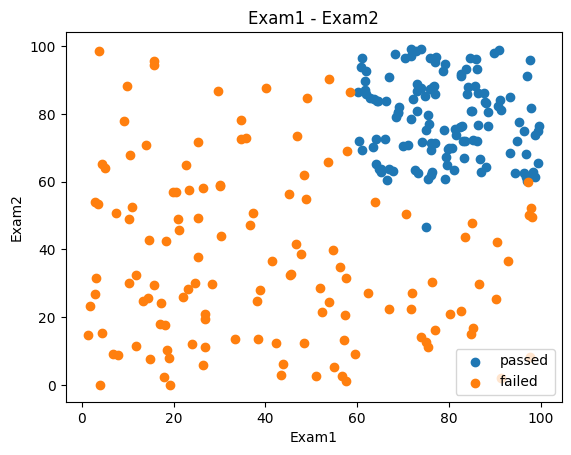

In [71]:
# add label mask
mask = data.loc[:, 'Pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [72]:
# define x,y
x = data.drop(['Pass'], axis=1)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']

In [73]:
# establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [74]:
# show the predict result and its accuracy
y_predict = LR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.9459459459459459


In [76]:
# exam1=70 exam2=65
y_test = LR.predict([[70, 65]])
print('passed' if y_test == 1 else 'failed')

passed


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


See the judgement edge.

In [77]:
LR.coef_

array([[0.12868797, 0.15684482]])

In [78]:
LR.intercept_

array([-18.52784291])

In [79]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)

0       89.720494
1       93.278873
2       88.716433
3       68.749906
4       53.283752
          ...    
254     97.903573
255     76.294180
256     73.024462
257    108.414100
258    100.973751
Name: Exam1, Length: 259, dtype: float64


<Figure size 640x480 with 0 Axes>

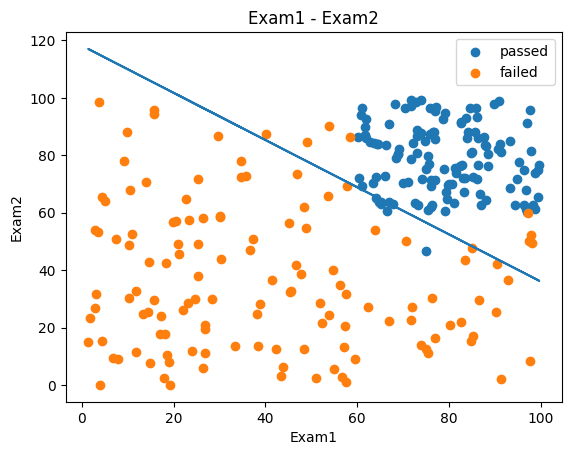

In [80]:
fig3 = plt.figure()
# add label mask
mask = data.loc[:, 'Pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1,x2_new)
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

Create 2D function
theta0+theta1*X1+theta2*X2+theta3*X1^2+theta4*X2^2+theta5*X1*X2 = 0

In [81]:
# create new data
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2


X_new = {
    'X1':x1, 
    'X2':x2, 
    'X1_2':x1_2,
    'X2_2':x2_2,
    'X1_X2':x1_x2
}

x_new = pd.DataFrame(X_new)
print(x_new)

            X1         X2         X1_2         X2_2        X1_X2
0    34.623660  78.024690  1198.797832  6087.852250  2701.500338
1    30.286710  43.895000   917.284803  1926.771025  1329.435135
2    35.847410  72.902200  1285.036804  5314.730765  2613.355053
3    60.182600  86.308550  3621.945343  7449.165803  5194.272941
4    79.032740  75.344380  6246.173992  5676.775598  5954.672795
..         ...        ...          ...          ...          ...
254  24.650129  30.098924   607.628838   905.945222   741.942345
255  50.987644   2.553514  2599.739792     6.520434   130.197659
256  54.972774   5.494835  3022.005884    30.193207   302.066299
257  11.839904  11.645025   140.183330   135.606605   137.875979
258  20.908198  49.121404   437.152732  2412.912343  1027.040029

[259 rows x 5 columns]


In [82]:
# establish new model and train
LR2 = LogisticRegression()
LR2.fit(x_new, y)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [83]:
y2_predict = LR2.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

0.9884169884169884


217   -146.104218
18    -143.658979
85    -138.922630
240   -138.563530
209   -137.471324
          ...    
146     59.734653
143     59.780730
111     59.995350
132     60.067929
134     60.124390
Name: Exam1, Length: 259, dtype: float64


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


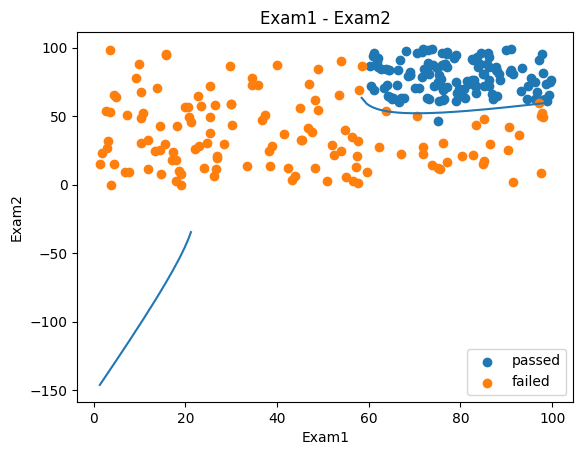

In [84]:
x1_new = x1.sort_values()

theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*x1_new+theta2
c = theta0+theta1*x1_new+theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b - 4*a*c)) / (2*a)
print(x2_new_boundary)

mask = data.loc[:, 'Pass']==1
fig5 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1_new, x2_new_boundary)
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()